In [35]:
from PIL import Image
import torch
import pandas as pd
import numpy as np

### OXFORD_DATASET

In [36]:
df = pd.read_csv("annotations/annotations/list.txt", sep=" ", skiprows= 6, header=None, names=["image_name", "class_id", "species", "breed_id"])
df

,image_name,class_id,species,breed_id
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [37]:
df_train = pd.read_csv("annotations/annotations/trainval.txt", sep=" ", header=None, names=["image_name", "class_id", "species", "breed_id"])
df_train

,image_name,class_id,species,breed_id
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
3675,yorkshire_terrier_187,37,2,25
3676,yorkshire_terrier_188,37,2,25
3677,yorkshire_terrier_189,37,2,25
3678,yorkshire_terrier_18,37,2,25


In [38]:
df_test = pd.read_csv("annotations/annotations/test.txt", sep=" ", header=None, names=["image_name", "class_id", "species", "breed_id"])
df_test

,image_name,class_id,species,breed_id
0,Abyssinian_201,1,1,1
1,Abyssinian_202,1,1,1
2,Abyssinian_204,1,1,1
3,Abyssinian_205,1,1,1
4,Abyssinian_206,1,1,1
...,...,...,...,...
3664,yorkshire_terrier_96,37,2,25
3665,yorkshire_terrier_97,37,2,25
3666,yorkshire_terrier_98,37,2,25
3667,yorkshire_terrier_99,37,2,25


In [48]:
def load_image(image_name):
    image_name = "images/images/"+ image_name + ".jpg"
    return np.array(Image.open(image_name))

In [49]:
df_train["image_arr"] = df_train.image_name.apply(load_image)


0       [[[37, 20, 12], [35, 18, 10], [36, 19, 11], [3...
1       [[[241, 228, 222], [237, 224, 218], [238, 223,...
2       [[[147, 130, 114], [145, 128, 112], [146, 130,...
3       [[[32, 12, 1], [30, 12, 0], [31, 13, 1], [30, ...
4       [[[226, 120, 81], [225, 119, 80], [224, 118, 7...
                              ...                        
3675    [[[242, 208, 147], [244, 209, 151], [242, 211,...
3676    [[[5, 5, 5], [6, 6, 6], [6, 6, 6], [5, 5, 5], ...
3677    [[[41, 32, 23], [41, 31, 22], [36, 32, 20], [3...
3678    [[[82, 112, 114], [84, 114, 116], [81, 111, 11...
3679    [[[125, 114, 108], [126, 116, 107], [126, 116,...
Name: image_name, Length: 3680, dtype: object

In [51]:
df_test["image_arr"] = df_test.image_name.apply(load_image)


### KAGGLE DATASET

(500, 394)

In [74]:
path = "train/train/"
Cat_Images = list()
Dog_Images = list()
for i in range(12500):
    Cat_Images.append(np.array(Image.open(path + f"cat.{i}.jpg")))
    Dog_Images.append(np.array(Image.open(path + f"dog.{i}.jpg")))



In [75]:
Cat_Images[0].shape

(374, 500, 3)

In [61]:
Dog_Images[0].shape

(375, 499, 3)

In [62]:
df_train.image_arr[0].shape

(500, 394, 3)

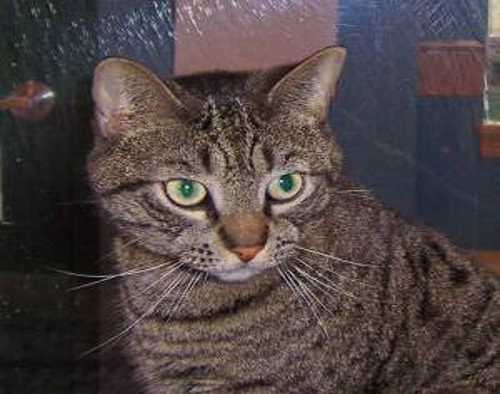

In [67]:
sample_img = Image.open(path + f"cat.1.jpg")
sample_img = sample_img.resize((500,394))
sample_img